# [IAPR][iapr]: Project


**Group ID:** 32

**Author 1 (sciper):** Alexia Dormann (301997)
**Author 2 (sciper):** Valgerdur Jónsdóttir (351819)
**Author 3 (sciper):** Mariia Eremina (342236)

**Release date:** 27.04.2023


## Important notes

The assignments are designed to teach practical implementation of the topics presented during class as well as preparation for the final project, which is a practical project which ties together the topics of the course. 

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook !** rerun the notebook from scratch `Kernel` > `Restart & Run All`


[iapr]: https://github.com/LTS5/iapr

---
## 0. Introduction

In this project, you will be working on solving tiling puzzles using image analysis and pattern recognition techniques. Tiling puzzles are a classic type of puzzle game that consists of fitting together pieces of a given shape (in this case squared to form a complete image. The goal of this project is to develop an algorithm that can automatically reconstruct tiling puzzles from a single input image. 

---

## 1. Data

### Input data
To achieve your task, you will be given images that look like this:


![train_00.png](data_project/train2/train_00.png)

### Example puzzle content
Example of input of solved puzzles.
Solution 1
<img src="data_project/train2_solutions/solution_00_00.png" width="512"/>
Solution 2
<img src="data_project/train2_solutions/solution_00_01.png" width="512"/>
Solution 3
<img src="data_project/train2_solutions/solution_00_02.png" width="512"/>
Outlier 1
<img src="data_project/train2_solutions/outlier_00_00.png" width="128"/>


### 1.1. Image layout

- The input for the program will be a single image with a size of __2000x2000 pixels__, containing the pieces of the tiling puzzles randomly placed in it. The puzzles sizes vary from __3x3, 3x4, or 4x4__ size. 
    -__You are guaranteed to always have the exact number of pieces for each puzzle__ 
        -For each puzzle, you are always expected to find exactly 9, 12, 16 pieces
        -If you find something else, either you are missing pieces, or added incorrect pieces for the puzzle

- The puzzle pieces are square-shaped with dimensions of 128x128 pixels (before rotation). 

- The input image will contain pieces from __two or three (but never four)__ different tiling puzzles, as well as some __extra pieces (outliers)__ that do not belong to either puzzle.


## 2. Tasks (Total 20 points) 


The project aims to:
1) Segment the puzzle pieces from the background (recover the pieces of 128x128 pixels)   \[ __5 points__ \] 

2) Extract features of interest from puzzle pieces images \[ __5 points__ \]   

3) Cluster puzzle pieces to identify which puzzle they belong, and identify outliers.  \[ __5 points__ \]   

4) Solve tiling puzzle (find the rotations and translations to correctly allocate the puzzle pieces in a 3x3, 3x4 or 4x4 array.) \[ __5 points__ \]   

##### The images used for the puzzles have self-repeating patterns or textures, which ensures that all puzzle pieces contain more or less the same features regardless of how they were cut. 




### 2.1. Output solution pieces.

For each inpute image, the output solution will include N images with solved puzzles, where N is the number of puzzles in the input image. and M images, that are Each of these images will contain the solved solution to one of the N puzzles in the input. 


-  Example input:  train_05.png

- Example solution:
        -solution_05_00.png solution_05_01.png solution_05_02.png 
        -outlier_05_00.png outlier_05_01.png outlier_05_02.png ...

- Example input:  train_07.png
- Example solution:
        -solution_07_00.png solution_07_01.png 
        -outlier_07_00.png outlier_07_01.png outlier_07_02.png ...


__Watch out!__ output resolution should always be like this:  
<table ><tr><th >Puzzle pieces <th><th> pixel dimentions <th> <th> pixel dimentions <th> <tr>
<tr><td> 3x3 <td><td> 384x384 <td><td> 3(128)x3(128) <td> <tr>
<tr><td> 3x4 <td><td> 384x512 <td><td> 3(128)x4(128)<tr>
<tr><td> 4x4 <td><td> 512x512 <td><td> 4(128)x4(128)<tr>
<tr><td> 1x1 (outlier)<td><td> 128x128 <td><td> (1)128x(1)128 <td><tr><table>





__Order of the solutions (and rotations) it's not a problem for the grading__




the output solution will be a final image of resolution (1283)x(1283), with each piece correctly placed in its corresponding location in the 3x3 array. Similarly, if the puzzle consists of 3x4 or 4x4 pieces, the output solution will be an image of resolution (1283)x(1284) or (1284)x(1284)



### 2.2 Data folder Structure

You can download the data for the project here: [download data](https://drive.google.com/drive/folders/1k3xTH0ZhpqZb3xcZ6wsOSjLzxBNYabg3?usp=share_link)

```
data_project
│
└─── project_description
│    │    example_input.png      # example input images
│    │    example_textures1.png      # example input images
│    │    example_textures2.png      # example input images
│    └─── ultimate_test.jpg   # If it works on that image, you would probably end up with a good score
│
└─── train
│    │    train_00.png        # Train image 00
│    │    ...
│    │    train_16.png        # Train image 16
│    └─── train_labels.csv    # Ground truth of the train set
|    
└────train_solution
│    │    solution_00_00.png        # Solution puzzle 1 from Train image 00
│    │    solution_00_01.png        # Solution puzzle 2 from Train image 00
│    │    solution_00_02.png        # Solution Puzzle 3 from Train image 00
│    │    outlier_00_00.png         # outlier     from Train image 00
│    │    outlier_00_01.png         # outlier     from Train image 00
│    │    outlier_00_03.png         # outlier     from Train image 00
│    │    ...
│    │    solution_15_00.png        # Solution puzzle 1 from Train image 15
│    │    solution_15_01.png        # Solution puzzle 2 from Train image 15
│    │    outlier_15_00.png         # outlier     from Train image 15
│    └─── outlier_15_01.png         # outlier     from Train image 15
│
└─── test
     │    test_00.png         # Test image 00 (day of the exam only)
     │    ...
     └─── test_xx.png             # Test image xx (day of the exam only)
```



## 3. Evaluation

**Before the exam**
   - Create a zipped folder named **groupid_xx.zip** that you upload on moodle (xx being your group number).
   - Include a **runnable** code (Jupyter Notebook and external files) and your presentation in the zip folder.
   
**The day of the exam**
   - You will be given a **new folder** (test folder) with few images, but **no ground truth** (no solutions).
   - We will ask you to run your pipeline in **real time** and to send us your prediction of the task you obtain with the provided function **save_results**. 
   - On our side, we will compute the performance of your classification algorithm. 
   - To evaluate your method, we will use the **evaluate_solution** function presented below. To understand how the provided functions work, please read the documentation of the functions in **utils.py**.
   - **Please make sure your function returns the proper data format to avoid points penalty on the day of the exam**. 
---


## 4. Your code

In [1]:
## import packages
import os
import matplotlib.pyplot as plt
import skimage.io
import pandas as pd
from sklearn.preprocessing import StandardScaler
import cv2
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
# initialize a list to store the results for the day of the exam
solution_test = [[], [], []]
# initialize the path to the test folder
folder = 'train2'   # SET THE PATH TO THE TEST FOLDER HERE
cluster_test = True # SET TO TRUE WHEN WE CLUSTER THE TEST SET
nb_cluster = [4, 3, 4, 3, 3, 4, 4, 4, 3, 4, 4, 4]     # SET THE NUMBER OF CLUSTERS FOR EACH IMAGE:

image_directory = 'data_project/'+folder
image_directory_train = 'data_project/train2'
saving_path_mask = 'data_project/'+folder+'_mask'
saving_path_features = 'data_project/'+folder+'_features'
saving_path_clusters = 'data_project/'+folder+'_clusters'

## 4.1. Segmenting the puzzle pieces

To segment the images, we use an edge detection method. First, we try out our method for one image. Then, we will apply it to all images and save both the images with the segmentation lines around each puzzle piece.

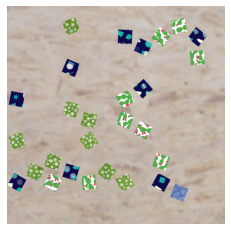

In [3]:
#Load image to explore 
img = skimage.io.imread('data_project/train2/train_02.png')

plt.imshow(img)
plt.axis('off')
plt.show()

We start by creating a function to segment the puzzle pieces, called `segment_pieces` (can be found in `segmentation.py`). We will use the following steps:
1. We preprocess the image using a median blur filter. This will remove noise and smoothen the image.
2. We find the edges of the image using the Canny edge detector.
3. We use mathematical morphology to dilate the edges to fill in the contours of the puzzle pieces. This makes the contours easier to detect.
4. We find the contours of the puzzle pieces, which represent the boundaries of the puzzle pieces.
5. A new blank image of the same size as the original image is created. For each contour found, the area inside the contour is filled with color in the new image.
6. Then, Canny edge detection is applied to the new image to find the edges of the puzzle pieces.
7. For each contour found, a minimum area rectangle is fitted around the contour. This rectangle represents the bounding box of the puzzle piece.
8. We return two objects: the image with the segmentation lines drawn on it, and the contours of the puzzle pieces.


To extract the puzzle pieces from the image, we define a function called `extract_pieces`, which can also be found in the file `segmentation.py`. We use the following steps:
1. For each contour found, we find the minimum area rectangle that fits around the contour.
2. Then, we create a new blank image of the same size as the original image, where the area inside the current contour is filled with white color and the rest is black.
3. Next, we create a new image, piece, where the puzzle piece is extracted from the original image using the new blank image (everything outside the puzzle piece is black).
4. Rotate the puzzle piece around the center of the minimum area rectangle by the angle of the rectangle.
5. Finally, we crop the puzzle piece to remove the black borders and add it to the list of extracted pieces.
6. We return the list of extracted pieces.

In [4]:
from segmentation import segment_pieces, extract_pieces
from helper_functions import display_images_in_grid

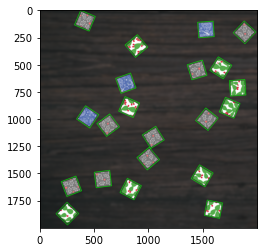

In [5]:
img = skimage.io.imread('data_project/train2/train_03.png')
seg, contours = segment_pieces(img)
plt.imshow(seg); plt.show()

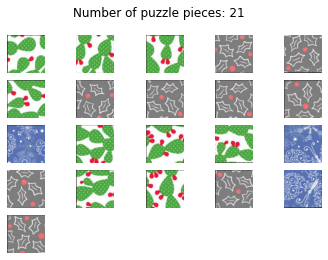

In [6]:
puzzles = extract_pieces(img, contours)
display_images_in_grid(puzzles)

In [7]:
from save_evaluation_files import save_mask
from segmentation import segment_pieces

image_directory = image_directory
saving_path = saving_path_mask
saving_path_color = 'data_project/train2_masks_color'
os.makedirs(saving_path, exist_ok=True)
os.makedirs(saving_path_color, exist_ok=True)

image_filenames = sorted(os.listdir(image_directory))

# remove DS.store from image_filenames
#if '.DS_Store' in image_filenames:
#    image_filenames.remove('.DS_Store')

for idx, image_filename in enumerate(image_filenames):
    if image_filename.endswith('.png'):
        image_path = os.path.join(image_directory, image_filename)
        image = cv2.imread(image_path)

        seg_save, mask_save, _ = segment_pieces(image, save_mask=True)

        # Save the segmented image
        save_mask(idx, seg_save, saving_path_color)
        save_mask(idx, mask_save, saving_path)
        # for test set on day of exam
        solution_test[0].append(mask_save)


## 4.2. Extracting features of interest

The functions used in this section can be found in the file `feature_extraction.py` and `feature_selection.py`.

### Color features
We observe that the puzzle pieces have different colors. Thus, we can use color features to describe the pieces. First, we will obtain color information from the color histogram of each puzzle piece. Color histograms represent color distribution in an image. However, color histograms do not capture spatial information, so we need to keep in mind that two completely different images can have the same color histogram. Then, we also compute the average and standard deviation of the red, green and blue color values of the image, and use that as features.

The following color features are computed from the color histogram of each puzzle piece:
1. Mean of color histogram.
2. Standard deviation of color histogram.
3. Average and standard deviation of red color values of the image.
4. Average and standard deviation of green color values of the image.
5. Average and standard deviation of blue color values of the image.

Here below, we plot the color histogram of a puzzle piece that was extracted from the image above.

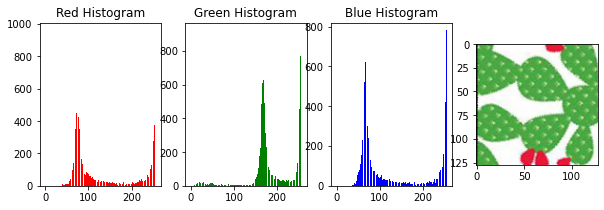

In [8]:
from helper_functions import plot_color_histogram

img_features = puzzles[11]
plot_color_histogram(img_features)

Now, we test our functions that extract the color features from the puzzle pieces. We use the function `mean_std_hist` to compute the mean and standard deviation of the color histogram, and the function `average_std_color` to compute the average and standard deviation of the red, green and blue color values of the image.

In [9]:
from feature_extraction import mean_std_hist, average_std_color

mean_hist, std_hist = mean_std_hist(img_features)
print('Mean of color histogram: ', mean_hist)
print('Standard deviation of color histogram: ', std_hist)

red_avg, green_avg, blue_avg, red_std, green_std, blue_std = average_std_color(img_features)
print('Average red color values of the image: ', red_avg)
print('Average green color values of the image: ', green_avg)
print('Average blue color values of the image: ', blue_avg)
print('Standard deviation of red color values of the image: ', red_std)
print('Standard deviation of green color values of the image: ', green_std)
print('Standard deviation of blue color values of the image: ', blue_std)

Mean of color histogram:  150.7426554361979
Standard deviation of color histogram:  74.69775931005863
Average red color values of the image:  138.6197509765625
Average green color values of the image:  187.6861572265625
Average blue color values of the image:  125.92205810546875
Standard deviation of red color values of the image:  76.46771039429518
Standard deviation of green color values of the image:  51.33736968477311
Standard deviation of blue color values of the image:  78.28524950338455


We also compute the grey color histogram, which might prove to be useful in the classification process of the grey puzzle pieces. Like before, the functions for that are in the file `feature_extraction.py`.

### Texture features
We can use Gabor filters to classify textures. Gabor filters are linear filters used for texture analysis, so they are able to analyze and understand the structural content or patterns in an image.

The Gabor filter is given with the following equation:
$$ gb(x,y) = \exp \left( -\frac{1}{2} \left( \frac{x_{\theta}^2}{\sigma^2} + \frac{y_{\theta}^2}{(\Gamma\sigma)^2} \right) \right) \cos \left( \frac{2 \pi}{\lambda} x_{\theta} + \psi \right) $$

2D Gabor filters have rich applications in image processing, especially in feature extraction for texture analysis and segmentation. $f$ defines the frequency being looked for in the texture. By varying $\theta$, we can look for texture oriented in a particular direction. By varying $\sigma$, we change the size of the image region being analyzed.

The scale of a Gabor filter is determined primarily by the wavelength (λ) of the sinusoidal wave in the Gabor function and also by the standard deviation (σ) of the Gaussian function.

1. **Wavelength (λ):** This parameter determines the frequency of the sinusoidal part of the Gabor filter and thus defines the size of the structures (e.g., edges, lines) that the filter will respond to. For example, a Gabor filter with a small λ value will respond to high-frequency changes (small, finely detailed structures), while a filter with a large λ value will respond to low-frequency changes (large, coarse structures).

2. **Standard deviation (σ) of the Gaussian function:** This parameter controls the spatial extent of the Gabor filter (i.e., the size of the Gaussian window). A larger σ results in a larger filter size, which means the filter captures a larger area or scale in the image. Conversely, a smaller σ results in a smaller filter size, which captures a smaller area or scale in the image.

The following texture features will be extracted from the Gabor filter responses of each puzzle piece:
1. Mean of the filter responses.
2. Standard deviation of the filter responses.
3. Kurtosis of the filter respones. Kurtosis measures the "tailedness" of the distribution. High kurtosis might suggest the presence of strong edge-like or line-like features (which would generate high-magnitude responses from the Gabor filter), whereas a low kurtosis could indicate a more homogeneous or smooth texture.
4. From the Power spectrum of the filter responses, we can extract the following features:
    1. Mean power.
    2. Median power.
    3. Max power.
    4. Standard deviation of the power spectrum.
    4. Skewness of the power spectrum. Skewness measures the asymmetry of the distribution. A positive skewness indicates that the distribution is skewed right, whereas a negative skewness indicates that the distribution is skewed left.
    5. Kurtosis of the power spectrum.

As an example, we will plot the Gabor filter responses of a puzzle piece that was extracted from the image above. We define a Gabor filter bank, which is a collection of Gabor filters with different parameters. Then, we apply the Gabor filter bank to the image and plot the filtered images.

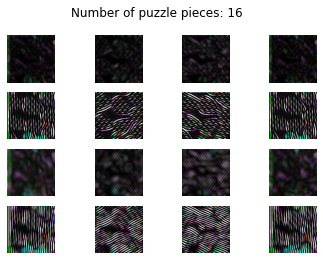

In [10]:
from feature_extraction import gabor_filter_bank, apply_gabor_filter_bank
# Create a gabor filter bank with the following parameters:
ksize = 31
sigmas = [3, 5]
lambdas = [3, 5]
thetas = [0, 45, 90, 135]
gabor_filter_bank_list = gabor_filter_bank(ksize, sigmas, lambdas, thetas)

# apply gabor filters and plot
filtered_images = apply_gabor_filter_bank(img_features, gabor_filter_bank_list)
display_images_in_grid(filtered_images)

### Shape features

We can also use shape features for the contours in the puzzle pieces, such as
1. The average circularity.
2. Area.
3. Perimeter of all contours in the image.

The function to extract shape features is given in the file `feature_extraction.py`, called `compute_shape_feat`. We will use this function to extract the shape features of the puzzle pieces.

In [11]:
from feature_extraction import compute_shape_feat

# extract shape features for each img_features
avg_circ, area, peri = compute_shape_feat(img_features)

print('Average circularity: ', avg_circ)
print('Area: ', area)
print('Perimeter: ', peri)

Average circularity:  0.44476678031597183
Area:  2.613390928725702
Perimeter:  11.475672063765721


To extract from the puzzle pieces all features, both color, texture, and shape, we define a function called `extract_features`. This function takes as input an image and returns a dictionary with all the features that we want to extract. The keys of the dictionary are the names of the features and the values are the values of the features.

In [12]:
from feature_extraction import extract_features

# extract features for each piece
features = [extract_features(x, gabor_filter_bank_list) for x in puzzles]
features = pd.DataFrame(features)

print('Number of puzzle pieces: ', len(features))
print('Number of features for each piece: ', len(features.columns))
features.head()

Number of puzzle pieces:  21
Number of features for each piece:  144


,mean_color,std_color,avg_red,avg_green,avg_blue,mean_gabor_1,mean_gabor_2,mean_gabor_3,mean_gabor_4,mean_gabor_5,...,area,perimeter,std_red,std_blue,std_green,mean_grey,std_grey,peaks,max_peak,avg_grey
0,0.004010,0.044012,161.476624,201.185547,152.950195,14.412109,14.240051,14.702209,13.930420,40.563660,...,3.610204,14.999098,82.588904,86.404050,53.758730,0.022791,64.001276,65,0.414162,182.239624
1,0.004349,0.043980,153.516418,194.719482,140.038269,14.710388,16.256470,14.720276,14.247925,48.813049,...,4.034328,11.999208,79.828646,83.418922,52.779644,0.023787,60.919137,53,0.283960,173.672363
2,0.004192,0.043995,156.800171,193.615967,143.501892,16.260986,12.384338,13.384644,15.708435,46.866272,...,5.378543,15.735183,80.987944,84.882954,57.286108,0.024399,63.897065,56,0.381228,174.431580
3,0.003721,0.044037,145.372559,139.010193,139.338684,16.032532,15.222107,13.779480,16.018982,37.495117,...,67.660156,43.408976,38.582700,34.018992,34.034747,0.014009,33.660261,61,0.841647,139.920471
4,0.003620,0.044046,142.210693,138.443481,138.709717,13.056030,16.583557,13.600708,12.807129,38.411072,...,37.512563,29.665769,37.816018,35.404239,35.280947,0.015317,35.089778,55,0.810597,139.041321


### Feature selection

Since we have a lot of features, we need to select those that tells us the most about the puzzle pieces. We tested two different methods to do so, PCA and Mutual Information, and in the end we decided to use Mutual Information.
- **PCA:** One way to perform feature selection is to use Principal Component Analysis (PCA). PCA is a dimensionality reduction technique that uses linear transformations to project the data into a lower-dimensional space. The idea is to find a new set of variables, called principal components, that are linear combinations of the original variables and that capture as much information as possible from the original variables. The first principal component captures the most information, the second principal component captures the second most information, and so on. We can then select the first $k$ principal components that capture the most information and use them as features.
- **Mutual information:** Mutual information measures how much information the presence/absence of a feature contributes to making the correct prediction on Y. If the feature is independent of Y, then the mutual information is zero. If the feature is completely determined by Y, then the mutual information is high. In other words, mutual information measures how much knowing X reduces uncertainty about Y.

We start by extracting all features from all images in the training set.

In [13]:
from feature_extraction import extract_features_all_img

all_feat = extract_features_all_img(image_directory, gabor_filter_bank_list)

In [14]:
for i in range(len(all_feat)):
    print("Shape of feature vector for image", i, ":", all_feat[i].shape)

Shape of feature vector for image 0 : (28, 144)
Shape of feature vector for image 1 : (21, 144)
Shape of feature vector for image 2 : (28, 144)
Shape of feature vector for image 3 : (21, 144)
Shape of feature vector for image 4 : (20, 144)
Shape of feature vector for image 5 : (28, 144)
Shape of feature vector for image 6 : (29, 144)
Shape of feature vector for image 7 : (28, 144)
Shape of feature vector for image 8 : (27, 144)
Shape of feature vector for image 9 : (29, 144)
Shape of feature vector for image 10 : (28, 144)
Shape of feature vector for image 11 : (19, 144)


#### 1. PCA

To determine the number of principal components to keep, we can plot the cumulative variance explained by the principal components and select the number of principal components that explain most of the variance. We can also use the "elbow method" to select the number of principal components. The idea is to select the number of principal components at the "elbow" of the plot, which is the point where the explained variance stops increasing rapidly.

The cumulative variance array shows the proportion of the total variance that is explained by the first principal component, the first two principal components, the first three principal components, and so on. It provides insights into how many principal components are needed to capture a desired amount of information or variance in the dataset.

The cumulative variance curve can help determine the optimal number of principal components to retain for dimensionality reduction or feature selection. By setting a threshold for the cumulative variance (e.g., 95% of the total variance), we can select the smallest number of principal components that capture a significant portion of the variance in the data.

The elbow method is a common approach used to determine the suitable number of principal components (PCs) to retain in PCA. It involves plotting the cumulative explained variance as a function of the number of PCs and looking for a point on the plot where adding more PCs does not significantly increase the explained variance. This point is often referred to as the "elbow" and indicates a suitable number of PCs to retain.

Keeping these methods in mind, we can aim to find the suitable number of principal components for our dataset.

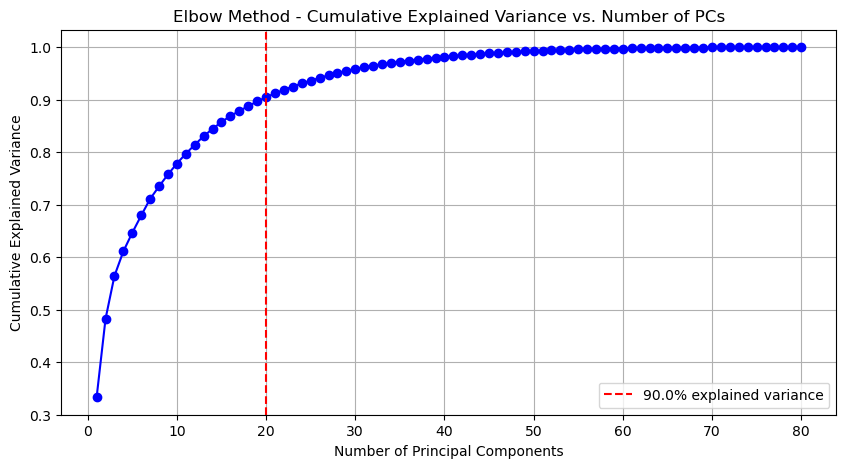

Number of selected features: 20


In [15]:
from feature_selection import perform_PCA_and_plot_explained_variance

all_feat_together = np.concatenate(all_feat)
# first we normalize the features to make them comparable
# convert all feat to pandas
features = pd.DataFrame(all_feat_together)

features_normalized = StandardScaler().fit_transform(features)
# select features using PCA
sel_features, principal_components, n_components = perform_PCA_and_plot_explained_variance(features_normalized, exp_variance=0.90)
print("Number of selected features:", n_components)

Now, we will extract the selected features from the feature matrix. We pick the first `n_components` principal components, which explain 90% of the variance. From the first `n_components` principal components, we select the 5 features with the highest absolute loadings. We repeat this process for all `n_components` principal components.

In [16]:
x_df = pd.DataFrame(all_feat_together)
loadings = pd.DataFrame(principal_components[:n_components], columns=x_df.columns)

# Identifying the features associated with the first n principal components
selected_features = []
for i in range(n_components):
    features_pc = loadings.iloc[i].abs().nlargest(5).index
    selected_features.extend(features_pc)
    print("Features belonging to Principal Component", i + 1, ":")
    print(features_pc)

selected_features = np.unique(selected_features)
print("Total number of selected features:", len(selected_features))
print("Indexes of selected features:")
print(selected_features)

Features belonging to Principal Component 1 :
Int64Index([30, 29, 14, 13, 42], dtype='int64')
Features belonging to Principal Component 2 :
Int64Index([7, 8, 79, 40, 39], dtype='int64')
Features belonging to Principal Component 3 :
Int64Index([74, 3, 76, 1, 0], dtype='int64')
Features belonging to Principal Component 4 :
Int64Index([64, 63, 55, 56, 62], dtype='int64')
Features belonging to Principal Component 5 :
Int64Index([47, 51, 4, 19, 43], dtype='int64')
Features belonging to Principal Component 6 :
Int64Index([66, 58, 65, 64, 67], dtype='int64')
Features belonging to Principal Component 7 :
Int64Index([66, 58, 68, 21, 26], dtype='int64')
Features belonging to Principal Component 8 :
Int64Index([0, 1, 46, 4, 47], dtype='int64')
Features belonging to Principal Component 9 :
Int64Index([78, 75, 22, 1, 58], dtype='int64')
Features belonging to Principal Component 10 :
Int64Index([66, 58, 48, 63, 23], dtype='int64')
Features belonging to Principal Component 11 :
Int64Index([52, 71, 74

Now, we extract the samples and corresponding indexing of features:

In [17]:
all_features_after_selection = x_df.iloc[:,selected_features]
print("Number of samples:", len(all_features_after_selection))
print("Number of features:", len(all_features_after_selection.columns))
all_features_after_selection.head()

Number of samples: 306
Number of features: 54


,0,1,2,3,4,7,8,13,14,19,...,68,69,70,71,74,75,76,77,78,79
0,-0.483408,0.500757,-0.900550,0.269119,-0.480925,0.393643,0.371887,-1.691629,-1.617529,-1.702883,...,1.190644,-1.658946,-0.037770,0.062191,-0.300807,-1.085350,-0.942220,0.948202,0.886443,-0.511584
1,1.289443,-1.282881,-0.335233,0.265604,-0.220249,-0.009475,0.048353,-1.017770,-1.213220,-1.238685,...,0.577289,-1.009251,3.216157,3.120547,0.818046,-0.632306,0.051080,1.092493,0.696614,-0.083382
2,-0.405030,0.426938,-0.407194,-1.016398,1.307543,0.792691,0.793177,1.517014,1.405131,1.382376,...,-0.754977,0.789019,0.147200,1.133571,0.157971,-0.403410,-0.358088,-0.783297,0.673385,0.420498
3,-0.834487,0.825506,0.112940,0.355329,-1.260765,-1.428214,-1.441842,0.266904,0.079914,0.118272,...,-0.333798,-0.443959,-1.102808,-0.746617,-0.249637,1.287709,0.596775,0.659619,-1.267496,-1.053490
4,-0.378561,0.402011,-0.056725,0.142591,-1.337754,-1.858458,-1.832246,0.102791,0.401149,0.057298,...,-0.838873,-0.258852,-0.848474,-0.879031,-0.282067,1.293175,0.572614,0.226744,-1.250338,-1.382713


#### 2. Mutual information

Now, we will use another method to perform feature selection. We define a function in `feature_selection.py`, called `MIM`.
This function takes an image, its corresponding true labels, and a list of Gabor filters, extracts the image's features, and uses Mutual Information (MI) to select the most important features. Features are considered important if their MI value is greater than 1.

We start by defining lists with the true labels for each image in the training set.

In [15]:
y_true_puzzles = [
    [1, 1, 2, 3, 3, 2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 3, 2, 3, 3, 1, 3, 2, 2, 4, 3, 2, 3, 2],
    [1, 1, 2, 3, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 3, 1, 3],
    [1, 2, 2, 3, 4, 3, 4, 3, 4, 4, 2, 4, 4, 2, 4, 2, 4, 3, 2, 3, 3, 2, 3, 3, 3, 2, 2, 4],
    [1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 3, 1, 1, 1, 3, 2, 1, 1, 2, 3, 2],
    [1, 2, 3, 2, 3, 2, 3, 2, 2, 2, 3, 2, 3, 3, 3, 2, 1, 3, 2, 3],
    [1, 2, 2, 3, 3, 2, 3, 3, 1, 3, 3, 2, 1, 2, 1, 3, 1, 1, 1, 3, 1, 2, 2, 2, 3, 4, 1, 2],
    [1, 2, 1, 2, 2, 1, 3, 3, 1, 3, 1, 3, 2, 4, 2, 2, 3, 2, 1, 3, 4, 2, 3, 2, 3, 1, 1, 1, 3],
    [1, 1, 2, 3, 2, 2, 4, 1, 3, 1, 3, 3, 1, 2, 1, 3, 3, 3, 2, 1, 3, 3, 2, 1, 2, 2, 2, 1],
    [1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 3, 1, 2, 1, 1, 2, 1, 3, 2, 1],
    [1, 2, 1, 3, 1, 1, 1, 4, 4, 2, 2, 1, 2, 3, 2, 2, 2, 1, 4, 2, 4, 4, 2, 1, 4, 1, 4, 4, 4],
    [1, 1, 2, 3, 2, 2, 3, 3, 1, 2, 2, 3, 1, 3, 1, 2, 2, 1, 1, 3, 1, 2, 1, 2, 4, 3, 3, 3],
    [1, 2, 2, 3, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 3, 2]
]

Then, we perform the feature selection:

In [16]:
from feature_selection import MIM

features = []
for i, file_name in enumerate(sorted(os.listdir(image_directory_train))):
    if file_name.endswith('.png'):
        feat = MIM(image_directory_train + '/' + file_name, y_true_puzzles[i], gabor_filter_bank_list)
        features.append(feat)

index_selected_features = list(np.unique([int(x) for x in list(np.concatenate(features))])) + [6]
print("Index of selected features is:", index_selected_features)
print("Number of features:", len(index_selected_features))

Index of selected features is: [0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 21, 23, 24, 25, 28, 29, 32, 35, 43, 49, 52, 55, 56, 58, 59, 66, 67, 69, 72, 73, 74, 75, 76, 77, 80, 81, 82, 83, 84, 85, 90, 98, 136, 137, 138, 139, 140, 141, 142, 143, 6]
Number of features: 58


In the clustering process, we decide to use the features selected with the mutual information method, since it turned out to be more effective than the PCA method. Now, we will therefore save the feature vectors for each image in the training set, using the selected features.

In [17]:
all_feat_mi = all_feat.copy()
for i in range(len(all_feat_mi)):
    # extract features with selected columns and the column numbers are the index of selected features
    all_feat_mi[i] = all_feat_mi[i][:, index_selected_features]
    print("Shape of feature vector for image", i, ":", all_feat_mi[i].shape)

Shape of feature vector for image 0 : (28, 58)
Shape of feature vector for image 1 : (21, 58)
Shape of feature vector for image 2 : (28, 58)
Shape of feature vector for image 3 : (21, 58)
Shape of feature vector for image 4 : (20, 58)
Shape of feature vector for image 5 : (28, 58)
Shape of feature vector for image 6 : (29, 58)
Shape of feature vector for image 7 : (28, 58)
Shape of feature vector for image 8 : (27, 58)
Shape of feature vector for image 9 : (29, 58)
Shape of feature vector for image 10 : (28, 58)
Shape of feature vector for image 11 : (19, 58)


In [18]:
from save_evaluation_files import save_feature_map

saving_path = saving_path_features
os.makedirs(saving_path, exist_ok=True)

# Iterate through all feature vectors in all_feat_mi
for i, features in enumerate(all_feat_mi):
    # Save the feature array
    save_feature_map(i, features, saving_path)
    solution_test[1].append(features)

# 4.3 Cluster puzzle pieces

For clustering the puzzle pieces into their correct classes, we have defined functions in the file `clustering.py`. The main function is:

`segment_cluster_pieces`: The function loads an image from a directory, segments it into pieces, extracts features from these pieces and clusters them. The function also manages potential outliers within the clusters and merges clusters if necessary (using `merge_cluster` and `find_outlier`). Additionally, it calculates the precision of the resulting clustering with respect to the true labels (if the true labels are provided).

We will use hierarchical clustering to cluster the puzzle pieces. Hierarchical clustering is a method of cluster analysis that builds a hierarchy of clusters. It starts by treating each observation as a separate cluster. Then, it repeatedly executes the following two steps: (1) identify the two clusters that are closest together, and (2) merge the two most similar clusters. This process is iterated until all points are member of just one single cluster.

First, we indicate the number of clusters for each image we want the method to classify the puzzle pieces into, given with ```nb_clusters```. Then we perform the clustering:

In [19]:
from save_evaluation_files import save_cluster
from clustering import segment_cluster_pieces, relabel_and_find_min_label

feat = index_selected_features
# Directories
img_path = image_directory
saving_path = saving_path_clusters
os.makedirs(saving_path, exist_ok=True)

# Iterate over all files in the directories
precisions, predicted_clusters, pieces = [], [], []
for i, file_name in enumerate(sorted(os.listdir(img_path))):
    if file_name.endswith('.png'):
        if not cluster_test:
            prec, pred, piece = segment_cluster_pieces(os.path.join(img_path, file_name),
                                                        nb_cluster[i],
                                                        gabor_filter_bank_list,
                                                        feat,
                                                        y_true=y_true_puzzles[i])
            precisions.append(prec)
            predicted_clusters.append(pred)
            pieces.append(piece)
            print("Average precision:", np.nanmean(np.concatenate(precisions)))

        else:
            pred, piece = segment_cluster_pieces(os.path.join(img_path, file_name),
                                                        nb_cluster[i],
                                                        gabor_filter_bank_list,
                                                        feat)
            predicted_clusters.append(pred)
            pieces.append(piece)

Now, we will save the clustering results in a certain folder. The output results are images, where each row shows puzzle pieces belonging to the same cluster. The last row in the image shows the outliers:

In [20]:
# now we relabel the clusters and find the label with the minimum amount of pieces
min_label_all, count_all, predicted_clusters_relabeled = relabel_and_find_min_label(predicted_clusters)

# Creating solution for save_cluster function
for i in range(len(predicted_clusters_relabeled)):
    min_label = min_label_all[i]
    pred = predicted_clusters_relabeled[i]
    piece = pieces[i]

    num_clusters = max(pred)  # get the maximum cluster id in pred
    solution = [[] for _ in range(num_clusters)]  # make solution list length equal to number of clusters

    for cluster_idx, puzzle_piece in zip(pred, piece):
        if cluster_idx == min_label:
            # then add that cluster_idx in the end of the list
            solution[num_clusters-1].append(puzzle_piece)
        elif cluster_idx == num_clusters:
            solution[min_label-1].append(puzzle_piece)
        else:
            # add the puzzle piece to the cluster_idx-1 index
            solution[cluster_idx-1].append(puzzle_piece)  # indices in pred are 1-indexed

    # Save the clusters
    save_cluster(i, solution, saving_path)
    solution_test[2].append(solution)

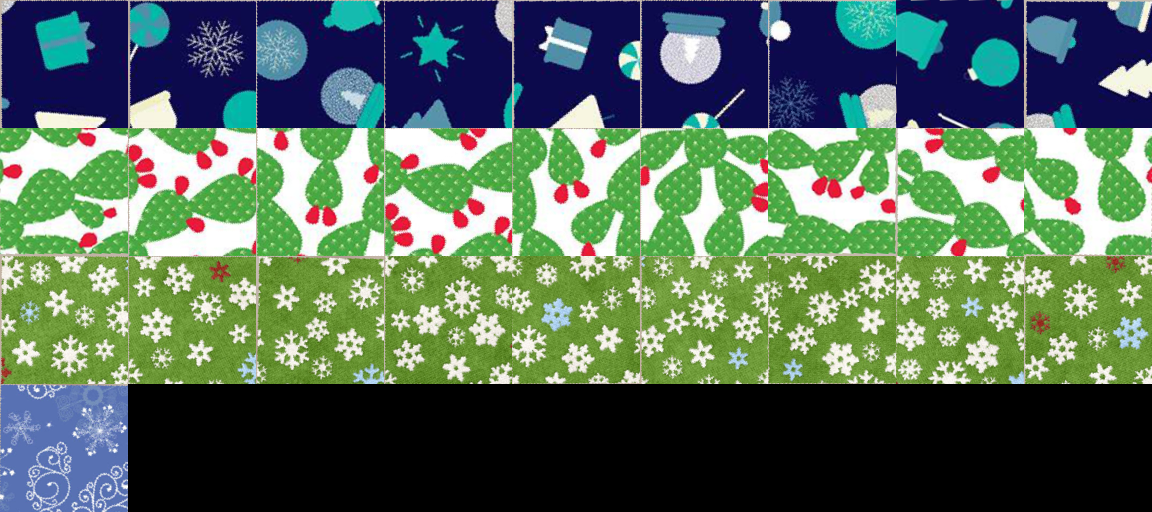

In [21]:
# Visalizing the clusters from the image we have used since the beginning
from IPython.display import Image
Image(filename='data_project/train2_clusters/cluster_images_02.png')

## Solve puzzle
To try to solve the puzzle we adapted the code from: https://github.com/hummingbird-12/image_puzzle/tree/master

In a few work what it does is compute the homogeneity of the pixels between the edges of the puzzle pieces. And try to maximize the homogeneity of the border pixel. The rotation and location of each of the puzzle is inferred using this minimization criterion. The full algorithm was not implmented, but one can found the difference between edges computation bellow. 

In [ ]:
#Define a class to hold all information about each piece and piece in the same puzzle
class Piece:
    def __init__(self, num, piece, nb_piece):
        self.pieceNum = num
        self.piece = piece

        # the 4 borders of the piece
        self.sideUp = self.piece[:,0,:]
        self.sideRight = self.piece[0,:,:] 
        self.sideDown = self.piece[:,-1,:]
        self.sideLeft = self.piece[0,:,:] 

        self.sides = [self.sideUp, self.sideRight, self.sideDown, self.sideLeft]

        self.difference = [None for x in range(nb_piece)]
        self.min_side = [None for x in range(nb_piece)]

        self.neighbors = [None for x in range(4)]


# determine homogeneity between two pixel
def pixel_difference(px1, px2, diff_thres=30):
    diff = 0
    for i in range(len(px1)):
        diff += abs(int(px1[i] - int(px2[i])))
    return False if diff < diff_thres else True


# calculate difference between pixels between two sides
def side_difference(side1, side2):
    difference = 0
    for i in range(len(side1)):
        difference += 1 if pixel_difference(side1[i], side2[i]) else 0
    return difference


# calculate difference between two pieces in all directions
def piece_difference(piece1: Piece, piece2: Piece):
    differences_sides, min_sides = [None for x in range(4)], [None for x in range(4)]
    for i, side_piece1 in enumerate(piece1.sides):
        diff_side = []
        for j, side_piece2 in enumerate(piece2.sides):
            diff_side.append(side_difference(side_piece1, side_piece2))
        
        #Find min distance to side
        min_side, min_diff = np.argmin(diff_side), np.min(diff_side)
        differences_sides[i]= min_diff; min_sides[i]= min_side
          
    piece1.difference[piece2.pieceNum] = differences_sides
    piece1.min_side[piece2.pieceNum] = min_sides

In [ ]:
#Define function for solving the puzzle, it is not fully implemented but the main point of the algorithm are described.
def solve_puzzle(pieces):
    
    #Create piece object
    puz = [Piece(i, p, len(pieces)) for i, p in enumerate(pieces)]
    
    #Compute difference between each side of the pieces
    for i in range(len(puz)):
        for j in range(len(puz)):
            piece_difference(puz[i], puz[j])
            puz[i].difference[i]= [1000,1000,1000,1000]
    
    #Get which piece minimize the difference between the edges
    for i in range(len(puz)):
        best_piece_side = pd.DataFrame(puz[i].difference).idxmin(axis=0)
        
    #Find pieces with the minimal difference between edges among all the pieces
    #Rotate the images for so that the found edges match
    #Concatenate the two piece in a new image
    #Compute the difference of each pieces with the new piece
    #Repeat until the puzzle is the right shape (3x3, 4x4, or 3x4)

    #During process make sure that the puzzle respect the shape that the solved puzzle will have (3x3, 4x4, or 3x4)

# Set-up for test_dataset

In [22]:
from save_evaluation_files import export_solutions

num_files = len(os.listdir(image_directory))
for i in range(num_files):
    sublist = [sub[i] for sub in solution_test]
    export_solutions(i, sublist, path="data_project", group_id="32")

saving solutions in folder:  data_project\solutions_group_32

saving solutions in folder:  data_project\solutions_group_32

saving solutions in folder:  data_project\solutions_group_32

saving solutions in folder:  data_project\solutions_group_32

saving solutions in folder:  data_project\solutions_group_32

saving solutions in folder:  data_project\solutions_group_32

saving solutions in folder:  data_project\solutions_group_32

saving solutions in folder:  data_project\solutions_group_32

saving solutions in folder:  data_project\solutions_group_32

saving solutions in folder:  data_project\solutions_group_32

saving solutions in folder:  data_project\solutions_group_32

saving solutions in folder:  data_project\solutions_group_32